<ipython-input-1-a7fe0ca39075>:166: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  veriler_egitim=np.array([


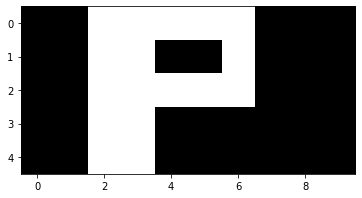

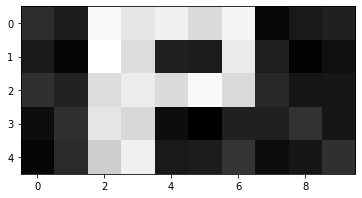

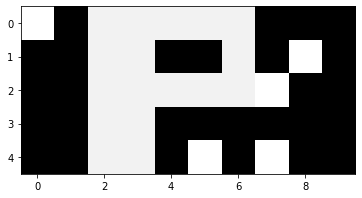

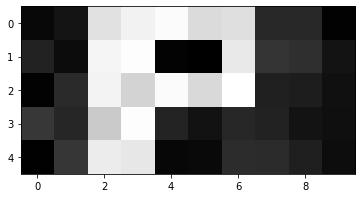

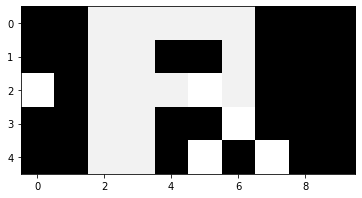

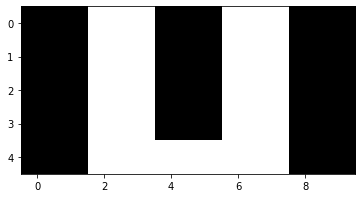

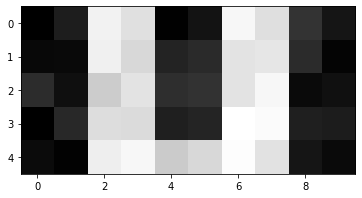

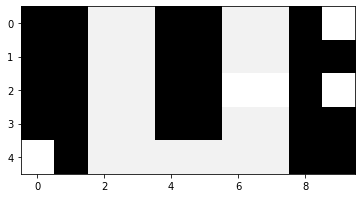

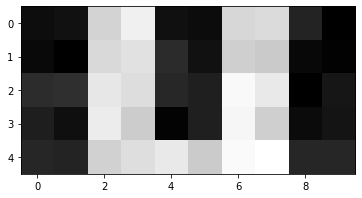

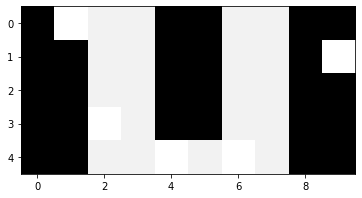

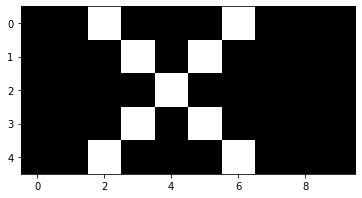

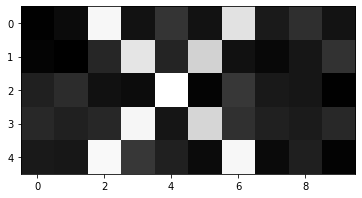

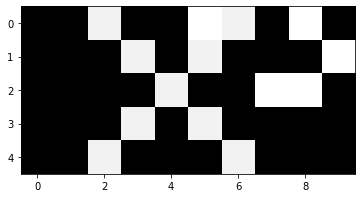

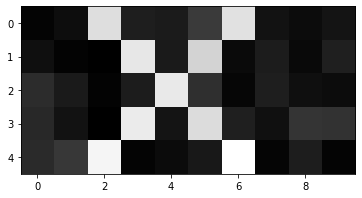

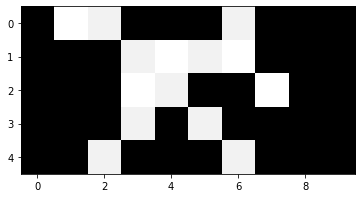

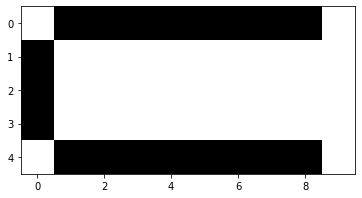

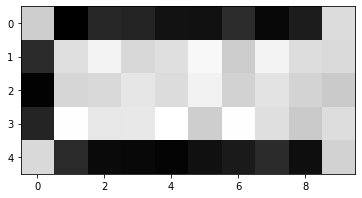

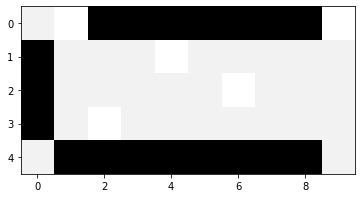

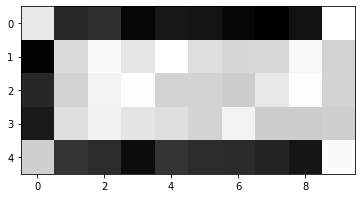

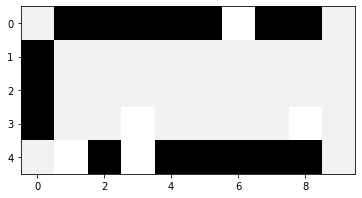

<ipython-input-1-a7fe0ca39075>:197: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test=np.array([


EĞİTİM,  100  İTERASYONDA TAMAMLANMIŞTIR.


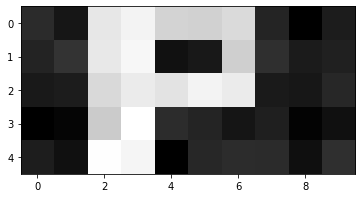



[ 0.59071105 -0.72193469 -0.83277284 -0.99255363] = Bu bir P Harfi


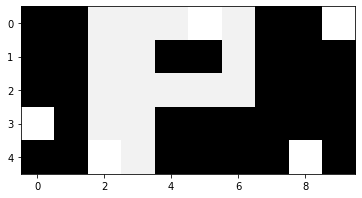



[ 0.60243555 -0.71774062 -0.83491568 -0.99265902] = Bu bir P Harfi


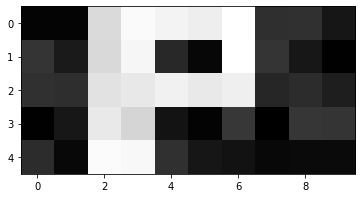



[ 0.59900852 -0.70580566 -0.84318214 -0.99244737] = Bu bir P Harfi


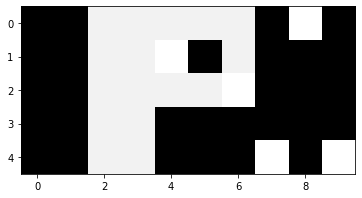



[ 0.59251757 -0.73413083 -0.82330289 -0.99275494] = Bu bir P Harfi


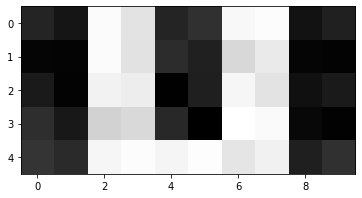



[-0.69684335  0.7874717  -0.99602451 -0.74921309] = Bu bir U Harfi


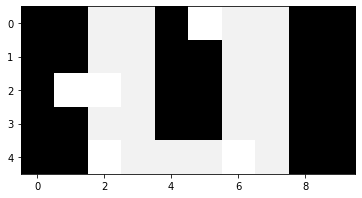



[-0.62904089  0.77951505 -0.99543353 -0.83076461] = Bu bir U Harfi


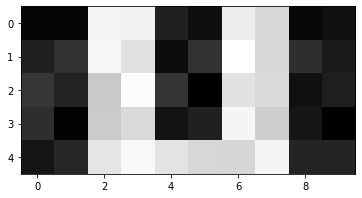



[-0.68120294  0.78536877 -0.99587734 -0.77292583] = Bu bir U Harfi


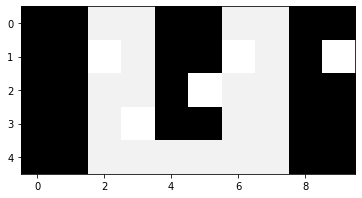



[-0.65594964  0.78462079 -0.99567323 -0.806446  ] = Bu bir U Harfi


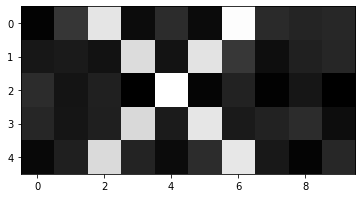



[-0.64726992 -0.99557733  0.8242136  -0.99524813] = Bu bir X Harfi


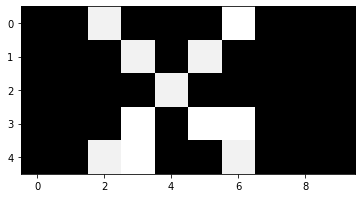



[-0.64868429 -0.99560929  0.82585724 -0.99528187] = Bu bir X Harfi


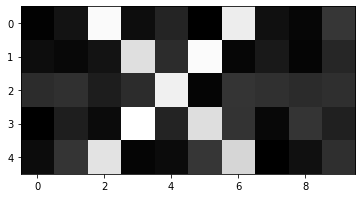



[-0.64954215 -0.99562105  0.82561778 -0.99524197] = Bu bir X Harfi


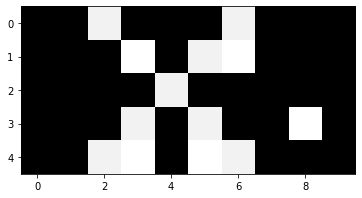



[-0.64460531 -0.99552897  0.82297793 -0.99527278] = Bu bir X Harfi


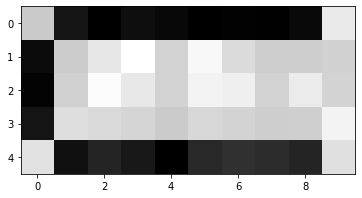



[-0.98384329 -0.86542191 -0.9132722   0.89167457] = Bu bir C Harfi


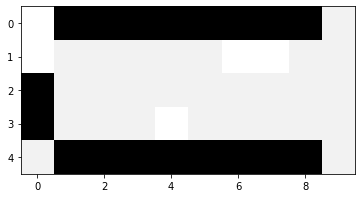



[-0.98573204 -0.91191188 -0.85313467  0.88275801] = Bu bir C Harfi


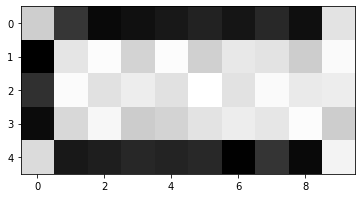



[-0.98038687 -0.75201052 -0.96175031  0.90741695] = Bu bir C Harfi


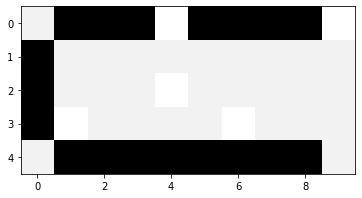



[-0.98516358 -0.91140534 -0.85507561  0.87979267] = Bu bir C Harfi


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

def bozma(image):
    noisy = image + 0.5 * np.random.rand(5, 10)
    noisy = noisy / noisy.max()
    return noisy
def eksiltme(image):
    rand_index1 = np.random.randint(0, 50)
    rand_index2 = np.random.randint(0, 50)
    rand_index3 = np.random.randint(0, 50)
    rand_index4 = np.random.randint(0, 50)
    rand_index5 = np.random.randint(0, 50)
    rand_image = np.array(image)
    rand_image[int(rand_index1 % 5),int(rand_index1 / 5)] = np.where(rand_image[int(rand_index1 % 5), int(rand_index1 / 5)] == 1,0.0, 1.0)
    rand_image[int(rand_index2 % 5), int(rand_index2 / 5)] = np.where(rand_image[int(rand_index2 % 5), int(rand_index2 / 5)] == 1, 0.0, 1.0)
    rand_image[int(rand_index3 % 5), int(rand_index3 / 5)] = np.where(rand_image[int(rand_index3 % 5), int(rand_index3 / 5)] == 1, 0.0, 1.0)
    rand_image[int(rand_index4 % 5), int(rand_index4 / 5)] = np.where(rand_image[int(rand_index4 % 5), int(rand_index4 / 5)] == 1, 0.0, 1.0)
    rand_image[int(rand_index5 % 5), int(rand_index5 / 5)] = np.where(rand_image[int(rand_index5 % 5), int(rand_index5 / 5)] == 1, 0.0, 1.0)
    return rand_image

def graf(vektor):
    vektor=(vektor+0.9)/1.8
    plt.imshow(vektor, cmap='gray')
    plt.show()
    return

def ileriyol(vektor,agırlık):
    vektor = np.insert(vektor,len(vektor),1)
    v=np.dot(agırlık,vektor)
    y=np.tanh(0.5*v)
    return y, v

def ileriyol_tum(vektor,w1,w2,w3,wo):
    v1=np.zeros(len(w1))
    v2=np.zeros(len(w2))
    v3=np.zeros(len(w3))
    vo=np.zeros(len(wo))
    y1=np.zeros(len(w1))
    y2=np.zeros(len(w2))
    y3=np.zeros(len(w3))
    y=np.zeros(len(wo))
    for a in range(len(w1)):
        y1[a],v1[a]=ileriyol(vektor,w1[a])
    for a in range(len(w2)):
        y2[a],v2[a]=ileriyol(y1,w2[a])
    for a in range(len(w3)):
        y3[a],v3[a]=ileriyol(y2,w3[a])
    for a in range(len(wo)):
        y[a],vo[a]=ileriyol(y3,wo[a])
    return y, vo, v2, v1,v3, y1, y2,y3

def anihata(yd,cikis):
    e=yd-cikis
    return e

def toplamanihata(hata):
    E=1/2*np.dot(hata,hata)
    return E

def tersaktif(a,v):
    fi=1/(np.cosh(a*v)**2) #np.arctanh(a*v)
    return fi

def cikisyerelgrad(e,vo):
    grad=np.multiply(e,tersaktif(0.5,vo))
    return grad

def arakatman(agirlik,yerelgrad,tersaktiff):
    w=np.transpose(agirlik[:,:-1])
    grad=np.multiply(np.matmul(w,yerelgrad),tersaktiff)
    return grad

def agirlikgüncelleme(agirlik,eskiagirlik,eta,grad,y,a):
    y = np.insert(y, len(y), 1)
    yeni=agirlik+eta*(grad[:,None]*y)+a*(agirlik-eskiagirlik)
    return yeni

def çka(egitimkümesi, toplamanihataa , eta , a , w1 , w2 , w3 , wo):

    eskiw1 = np.zeros(w1.shape)
    eskiw2 = np.zeros(w2.shape)
    eskiw3 = np.zeros(w3.shape)
    eskiwo = np.zeros(wo.shape)

    E = 1

    iterasyon = 0

    while E > toplamanihataa:
        for i in range(len(egitimkümesi)):
            vektor = np.reshape(egitimkümesi[i, 0], 50)
            y, vo, v2, v1, v3, y1, y2, y3 = ileriyol_tum(vektor, w1, w2, w3, wo)
            e = anihata(egitimkümesi[i, 1], y)
            E = toplamanihata(e)
            cikisgrad = cikisyerelgrad(e, vo)
            gizlikatman3grad = arakatman(wo, cikisgrad, tersaktif(0.5, v3))
            gizlikatman2grad = arakatman(w3, gizlikatman3grad, tersaktif(0.5, v2))
            gizlikatman1grad = arakatman(w2, gizlikatman2grad, tersaktif(0.5, v1))

            yeniw1 = agirlikgüncelleme(w1, eskiw1, eta, gizlikatman1grad, vektor, a)
            eskiw1 = w1
            w1 = yeniw1
            yeniw2 = agirlikgüncelleme(w2, eskiw2, eta, gizlikatman2grad, y1, a)
            eskiw2 = w2
            w2 = yeniw2
            yeniw3 = agirlikgüncelleme(w3, eskiw3, eta, gizlikatman3grad, y2, a)
            eskiw3 = w3
            w3 = yeniw3
            yeniwo = agirlikgüncelleme(wo, eskiwo, eta, cikisgrad, y3, a)
            eskiwo = wo
            wo = yeniwo
        iterasyon = iterasyon + 1
        if iterasyon == 100:
            break

    print("EĞİTİM, ",iterasyon," İTERASYONDA TAMAMLANMIŞTIR.")
    return w1, w2, w3, wo

def test(vektor,w1,w2,w3,wo):
    for i in range(len(vektor)):
        vektorr = np.reshape(vektor[i,0], 50)
        vektorrr=vektor[i,1]
        y_test= ileriyol_tum(vektorr, w1, w2, w3,wo)[0]
        graf(vektor[i,0])
        if y_test[0] > 0 and y_test[1] < 0 and y_test[2] < 0 and y_test[3] < 0 and vektorrr[0] > 0 and vektorrr[1] < 0 and vektorrr[2] < 0 and vektorrr[3] < 0:
            print("\n")
            print(y_test, "= Bu bir P Harfi")
        if y_test[0] < 0 and y_test[1] > 0 and y_test[2] < 0 and y_test[3] < 0 and vektorrr[0] < 0 and vektorrr[1] > 0 and vektorrr[2] < 0 and vektorrr[3] < 0:
            print("\n")
            print(y_test, "= Bu bir U Harfi")
        if y_test[0] < 0 and y_test[1] < 0 and y_test[2] > 0 and y_test[3] < 0 and vektorrr[0] < 0 and vektorrr[1] < 0 and vektorrr[2] > 0 and vektorrr[3] < 0:
            print("\n")
            print(y_test, "= Bu bir X Harfi")
        if y_test[0] < 0 and y_test[1] < 0 and y_test[2] < 0 and y_test[3] > 0 and vektorrr[0] < 0 and vektorrr[1] < 0 and vektorrr[2] < 0 and vektorrr[3] > 0:
            print("\n")
            print(y_test, "= Bu bir C Harfi")
    return

# VERİ KÜMESİ - aktivasyon fonksiyonun -1 ile 1 aralığında değer aldığı için satürasyonu engellemek için 1'e yakınsaması şartıyla 1'den küçük alıyoruz.
P_harf =np.array([[-0.9,-0.9,0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,0.9,-0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,0.9,0.9,0.9,-0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9]]) # 1 -1 -1 -1 

U_harf =np.array([[-0.9,-0.9,0.9,0.9,-0.9,-0.9,0.9,0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,0.9,0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,0.9,0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,-0.9,-0.9,0.9,0.9,-0.9,-0.9],
            [-0.9,-0.9,0.9,0.9,0.9,0.9,0.9,0.9,-0.9,-0.9] ]) #-1 1 -1 -1
X_harf =np.array([ [-0.9,-0.9,0.9,-0.9,-0.9,-0.9,0.9,-0.9,-0.9,-0.9],
                   [-0.9,-0.9,-0.9,0.9,-0.9,0.9,-0.9,-0.9,-0.9,-0.9],
                   [-0.9,-0.9,-0.9,-0.9,0.9,-0.9,-0.9,-0.9,-0.9,-0.9],
                   [-0.9,-0.9,-0.9,0.9,-0.9,0.9,-0.9,-0.9,-0.9,-0.9],
                   [-0.9,-0.9,0.9,-0.9,-0.9,-0.9,0.9,-0.9,-0.9,-0.9] ]) #-1 -1 1 -1
C_harf =np.array([[0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,0.9],
            [-0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
            [-0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
            [-0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9],
            [0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,-0.9,0.9]]) #-1 -1 -1 1

# eğitime girecek verileri görsellestiriyorum.

veriler_egitim=np.array([
            [P_harf,[1,-1,-1,-1]], # P_harf'i koydum ki önce temiz veriyi görselleştirsin.
            [bozma(P_harf),[1,-1,-1,-1]],
            [eksiltme(P_harf),[1,-1,-1,-1]],
            [bozma(P_harf),[1,-1,-1,-1]],
            [eksiltme(P_harf),[1,-1,-1,-1]],
            
            [U_harf,[-1,1,-1,-1]],
            [bozma(U_harf),[-1,1,-1,-1]],
            [eksiltme(U_harf),[-1,1,-1,-1]],
            [bozma(U_harf),[-1,1,-1,-1]],
            [eksiltme(U_harf),[-1,1,-1,-1]],
            
            [X_harf,[-1,-1,1,-1]],
            [bozma(X_harf),[-1,-1,1,-1]],
            [eksiltme(X_harf),[-1,-1,1,-1]],
            [bozma(X_harf),[-1,-1,1,-1]],
            [eksiltme(X_harf),[-1,-1,1,-1]],

            [C_harf,[-1,-1,-1,1]],
            [bozma(C_harf),[-1,-1,-1,1]],
            [eksiltme(C_harf),[-1,-1,-1,1]],
            [bozma(C_harf),[-1,-1,-1,1]],
            [eksiltme(C_harf),[-1,-1,-1,1]]])

for k in range(len(veriler_egitim)):
    graf(veriler_egitim[k,0])

np.random.shuffle(veriler_egitim)

# test verilerinin oluşturulması
x_test=np.array([
            [bozma(P_harf),[1,-1,-1,-1]],
            [eksiltme(P_harf),[1,-1,-1,-1]],
            [bozma(P_harf),[1,-1,-1,-1]],
            [eksiltme(P_harf),[1,-1,-1,-1]],
            
            [bozma(U_harf), [-1, 1, -1, -1]],
            [eksiltme(U_harf), [-1, 1, -1, -1]],
            [bozma(U_harf), [-1, 1, -1, -1]],
            [eksiltme(U_harf), [-1, 1, -1, -1]],
            
            [bozma(X_harf), [-1, -1, 1, -1]],
            [eksiltme(X_harf), [-1, -1, 1, -1]],
            [bozma(X_harf), [-1, -1, 1, -1]],
            [eksiltme(X_harf), [-1, -1, 1, -1]],
            
            [bozma(C_harf), [-1, -1, -1, 1]],
            [eksiltme(C_harf), [-1, -1, -1, 1]],
            [bozma(C_harf), [-1, -1, -1, 1]],
            [eksiltme(C_harf), [-1, -1, -1, 1]]])

w1=np.random.uniform(0,0.1,size=(10,51)) #ilk katman 5 nörondan oluşmakta
w2=np.random.uniform(0,0.1,size=(10,11)) #ikinci katman 3 nörondan oluşmakta
w3=np.random.uniform(0,0.1,size=(6,11))
wo=np.random.uniform(0,0.1,size=(4,7)) #son katman 4 nörondan oluşmakta

w1,w2,w3,wo=çka(veriler_egitim,0.01,0.01,0.5,w1,w2,w3,wo)
test(x_test,w1,w2,w3,wo)
